# Task 2: Linear Regression Model
### Level 1 - Machine Learning Internship

**Objective:**
Build and train a Linear Regression model to predict house prices based on the preprocessed dataset.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Preparation Step (From Task 1) ---
df = pd.read_csv('4) house Prediction Data Set.csv', delim_whitespace=True, header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data is ready for the model.")

Data is ready for the model.


C:\Users\EgyTech\AppData\Local\Temp\ipykernel_20696\2101335792.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('4) house Prediction Data Set.csv', delim_whitespace=True, header=None)


In [2]:
# 1. Initialize the Model
model = LinearRegression()

# 2. Train the Model
model.fit(X_train_scaled, y_train)
print("Model trained successfully.")

Model trained successfully.


In [3]:
# 3. Make Predictions
y_pred = model.predict(X_test_scaled)

# Compare first 5 actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_pred[:5]})
print(comparison)

   Actual  Predicted
0    23.6  28.996724
1    32.4  36.025565
2    13.6  14.816944
3    22.8  25.031979
4    16.1  18.769880


In [4]:
# 4. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score (Accuracy): {r2:.2f}")

Model Evaluation:
Mean Squared Error (MSE): 24.29
R2 Score (Accuracy): 0.67


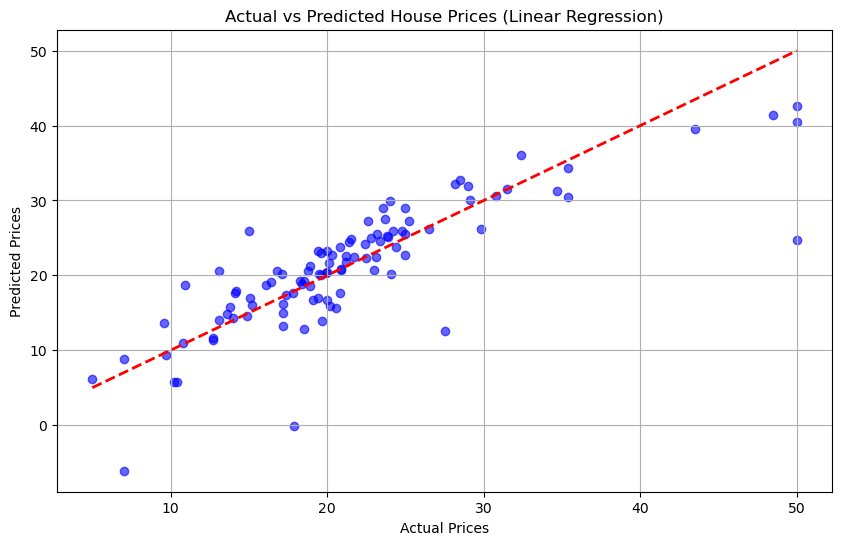

In [5]:
# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.grid(True)
plt.show()